In [1]:
from simphony_osp.namespaces import city, owl, foaf, emmo, emmodome#, dso_dome, owl, dcat

from simphony_osp.tools import semantic2dot, pretty_print
from simphony_osp.tools import search,  export_file, import_file, pretty_print, search
from simphony_osp.tools.search import sparql

from simphony_osp.ontology import RESTRICTION_QUANTIFIER, RESTRICTION_TYPE, OntologyIndividual
from simphony_osp.ontology.relationship import OntologyRelationship

from simphony_osp.session import Session, core_session

# Purpose
we want to test the use of namespaces and sessions and multiple files for sigra. The idea is: 

1. Sigra loads one name sapce and one ontology, domeo.ttl 
   1. this contains emmo as needed, with all other ontologies, including foaf, dso, etc, using owl:imports
2. we define two cuds containers with two different entities, but one which is related to both containers
3. we save the two cuds into different ttl, the we reload and check if the relation across the files/cuds is perserved. 

We use one session only. 

The problem is that simphony does not yet support exporting a node and all the subnodes, see: https://github.com/SimPhoNy-Future/osp-core/issues/4
   

In [2]:
haifa  = city.City(name='haifa', coordinates=[0,0])
Mezna  = city.Citizen(name="Mezna", age=66)
Kalish = city.Citizen(name="Kalish", age=55)

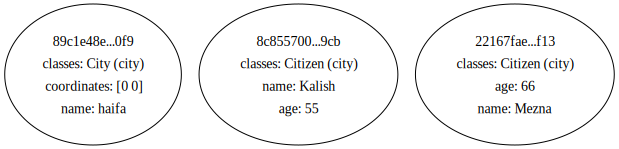

In [3]:
semantic2dot(core_session)

In [4]:
haifa.connect(Kalish, rel=city.hasMajor)

In [5]:
pretty_print(haifa)

- Ontology individual:
  identifier: 89c1e48e-a9cb-4967-a8ed-93e38751f0f9
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
        identifier: 8c855700-cb6e-478a-985c-72c995dd69cb
         age: 55
         name: Kalish


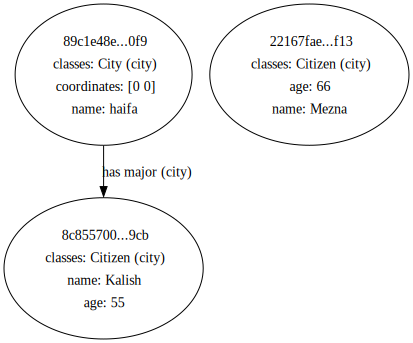

In [6]:
semantic2dot(core_session)

In [7]:
def triple(s=OntologyIndividual, p=OntologyRelationship, o=OntologyIndividual):
    s.connect(o, rel=p)
    return(s)

In [8]:
haifa.connect(Mezna, rel=city.hasMajor)

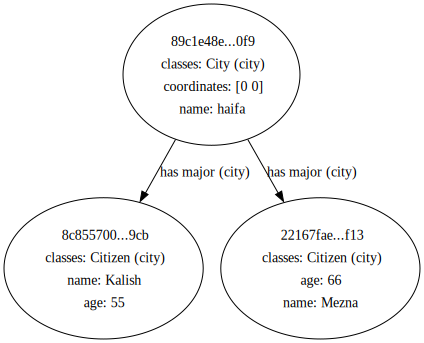

In [9]:
semantic2dot(core_session)

In [10]:
pretty_print(haifa)

- Ontology individual:
  identifier: 89c1e48e-a9cb-4967-a8ed-93e38751f0f9
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
      . identifier: 22167fae-960a-4fa0-9cad-e18e32e5ff13
      .  age: 66
      .  name: Mezna
     - Ontology individual of class Citizen
        identifier: 8c855700-cb6e-478a-985c-72c995dd69cb
         age: 55
         name: Kalish


In [11]:
neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ("The City", [47.99525, 7.84726]),
        ("Alperton", [47.99888, 7.83774]),
        ("Webmly Park", [48.00021, 7.86084]),
        ("Marylebone", [48.00779, 7.86268]),
        ("Battersea", [48.01684, 7.843]),
    ]
}

In [12]:
london = city.City(name='london', coordinates=[1,1])

In [13]:
pretty_print(london)

- Ontology individual:
  identifier: 932d5d8b-e12d-4fb7-9166-d718936aed17
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london


In [14]:
for neighborhood in neighborhoods:
    london.connect(neighborhood, rel=city.hasPart) 

In [15]:
pretty_print(london)

- Ontology individual:
  identifier: 932d5d8b-e12d-4fb7-9166-d718936aed17
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: 2bfbaffe-fc66-4ebd-9551-a46cc4b41985
      .  coordinates: [47.99525  7.84726]
      .  name: The City
     - Ontology individual of class Neighborhood
      . identifier: 3c386ef5-465c-4270-94bd-1d2bcc250538
      .  coordinates: [48.00021  7.86084]
      .  name: Webmly Park
     - Ontology individual of class Neighborhood
      . identifier: 80d16938-706b-4e26-a918-5d99a23b1d1a
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
      . identifier: b3fa207c-0879-42b2-9d28-e75a62a3ef17
      .  coordinates: [47.99888  7.83774]
      .  name: Alperton
     - Ontology indi

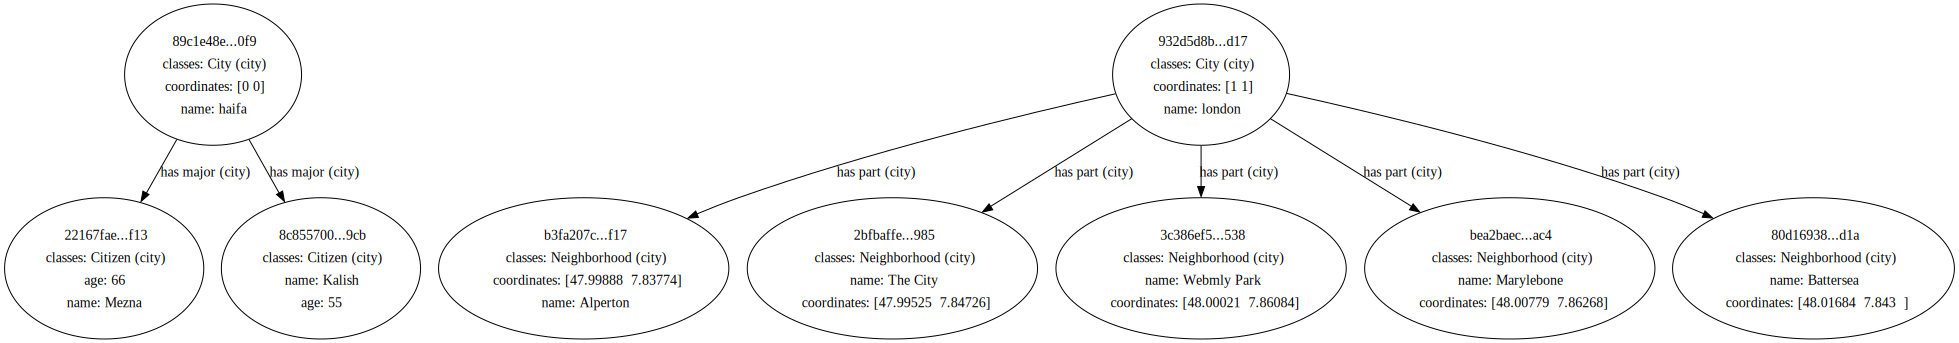

In [16]:
semantic2dot(core_session)

Now lets add Marylebone to haifa as well. 


In [17]:
print(type(neighborhoods))

<class 'set'>


In [18]:
for neighborhood in neighborhoods:
    if "Mary" in str(neighborhood.name):
        pretty_print (neighborhood)
        marylebone=neighborhood

- Ontology individual:
  identifier: bea2baec-f8e3-4437-8131-a38035856ac4
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.00779  7.86268]
           name: Marylebone


In [19]:
pretty_print(marylebone) # just double check

- Ontology individual:
  identifier: bea2baec-f8e3-4437-8131-a38035856ac4
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.00779  7.86268]
           name: Marylebone


In [20]:
haifa.connect(marylebone, rel=city.hasPart)

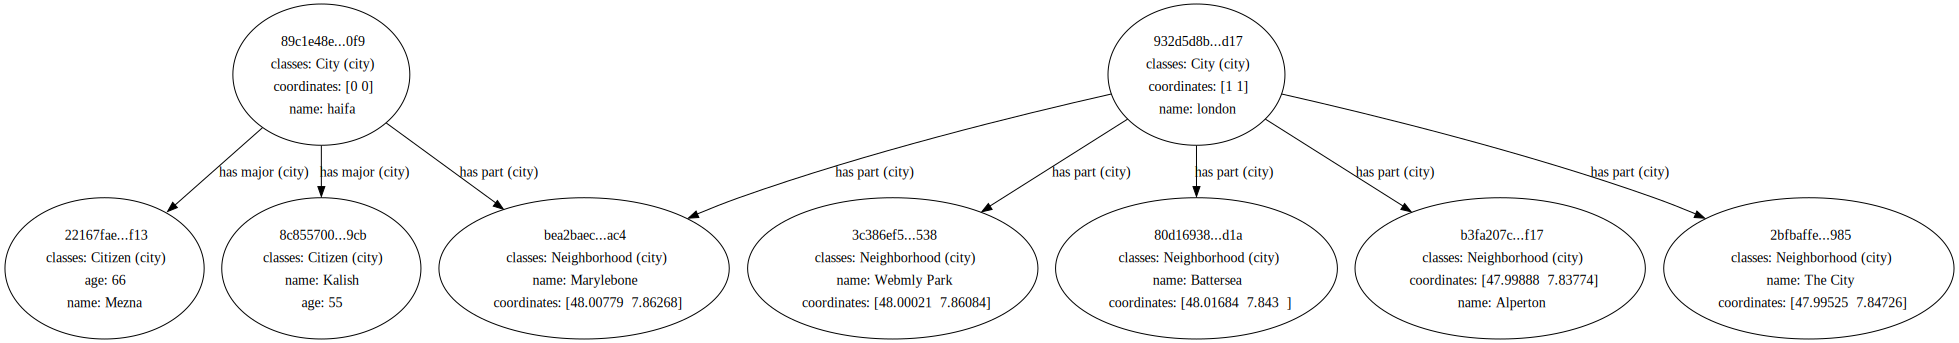

In [21]:
semantic2dot(core_session)

In [22]:
pretty_print(london)

- Ontology individual:
  identifier: 932d5d8b-e12d-4fb7-9166-d718936aed17
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: 2bfbaffe-fc66-4ebd-9551-a46cc4b41985
      .  coordinates: [47.99525  7.84726]
      .  name: The City
     - Ontology individual of class Neighborhood
      . identifier: 3c386ef5-465c-4270-94bd-1d2bcc250538
      .  coordinates: [48.00021  7.86084]
      .  name: Webmly Park
     - Ontology individual of class Neighborhood
      . identifier: 80d16938-706b-4e26-a918-5d99a23b1d1a
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
      . identifier: b3fa207c-0879-42b2-9d28-e75a62a3ef17
      .  coordinates: [47.99888  7.83774]
      .  name: Alperton
     - Ontology indi

In [23]:
pretty_print(haifa)

- Ontology individual:
  identifier: 89c1e48e-a9cb-4967-a8ed-93e38751f0f9
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
   | - Ontology individual of class Citizen
   |  . identifier: 22167fae-960a-4fa0-9cad-e18e32e5ff13
   |  .  age: 66
   |  .  name: Mezna
   | - Ontology individual of class Citizen
   |    identifier: 8c855700-cb6e-478a-985c-72c995dd69cb
   |     age: 55
   |     name: Kalish
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
        identifier: bea2baec-f8e3-4437-8131-a38035856ac4
         coordinates: [48.00779  7.86268]
         name: Marylebone


In [24]:
for neighborhood in neighborhoods:
    if "Bat" in str(neighborhood.name):
        pretty_print (neighborhood)
        bater=neighborhood

- Ontology individual:
  identifier: 80d16938-706b-4e26-a918-5d99a23b1d1a
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.01684  7.843  ]
           name: Battersea


In [25]:
bater

<OntologyIndividual: 80d16938-706b-4e26-a918-5d99a23b1d1a>

In [26]:
haifa.connect(bater, rel=city.hasPart)

In [27]:
pretty_print(haifa)

- Ontology individual:
  identifier: 89c1e48e-a9cb-4967-a8ed-93e38751f0f9
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
   | - Ontology individual of class Citizen
   |  . identifier: 22167fae-960a-4fa0-9cad-e18e32e5ff13
   |  .  age: 66
   |  .  name: Mezna
   | - Ontology individual of class Citizen
   |    identifier: 8c855700-cb6e-478a-985c-72c995dd69cb
   |     age: 55
   |     name: Kalish
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: 80d16938-706b-4e26-a918-5d99a23b1d1a
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
        identifier: bea2baec-f8e3-4437-8131-a38035856ac4
         coordinates: [48.00779  7.86268]
         name: Marylebone


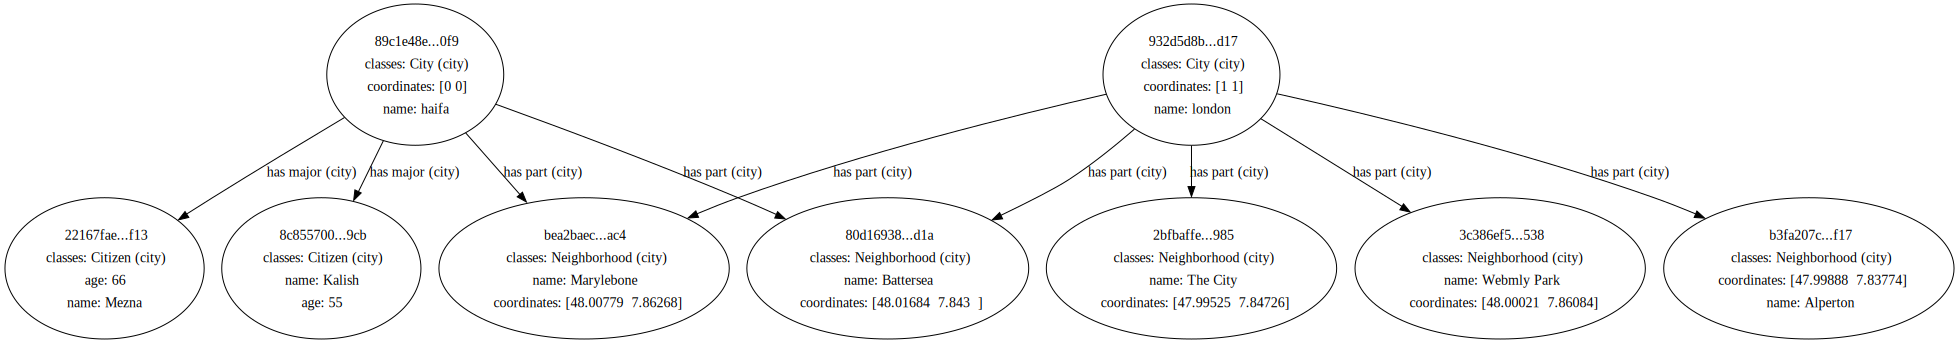

In [28]:
semantic2dot(core_session)

Now we have two CUDS, i.e., london and haifa, lets save each into a different ttl

In [29]:
export_file(london, file='./london.ttl', format='turtle', all_triples = True, all_statements=True)

In [30]:
export_file(haifa, file='./haifa.ttl', format='turtle')

In [31]:
export_file(core_session, file="./sigradB.ttl", format="turtle", all_triples=True, all_statements=True)

In [32]:
ds1=emmo.DataSet()


In [33]:
pretty_print(ds1)

- Ontology individual:
  identifier: 6aa6e663-1477-4075-85b7-7b6d0a32ace0
  type: DataSet (emmo )
  superclasses: DataSet (emmo ), EncodedData (emmo ), Data (emmo ), Perspective (emmo ), CausalStructure (emmo ), Item (emmo ), EMMO (emmo ), Thing (owl )


In [36]:
soi=emmodome.SomeOtherItem()


In [37]:
pretty_print(soi)

- Ontology individual:
  identifier: 364c0f30-6596-4ddb-8662-4f383525b521
  type: None (emmodome )
  superclasses: None (emmodome ), Item (emmodome ), EMMO (emmodome ), Thing (owl )


In [38]:
sods=emmodome.DataSet()


In [39]:
pretty_print(sods)

- Ontology individual:
  identifier: 165f09c7-6438-4cbb-ad7a-e65a01cc375f
  type: DataSet (emmodome )
  superclasses: DataSet (emmodome ), EncodedData (emmodome ), Data (emmodome ), Perspective (emmodome ), CausalStructure (emmodome ), Item (emmodome ), EMMO (emmodome ), Thing (owl )


In [40]:
ds1.connect(sods, rel=owl.)

In [41]:
cal=emmo.Calendering()

In [42]:
ds1.connect(cal, rel=emmo.isDirectCauseOf)

In [43]:
cal.connect(sods, rel=emmo.isPartOf)

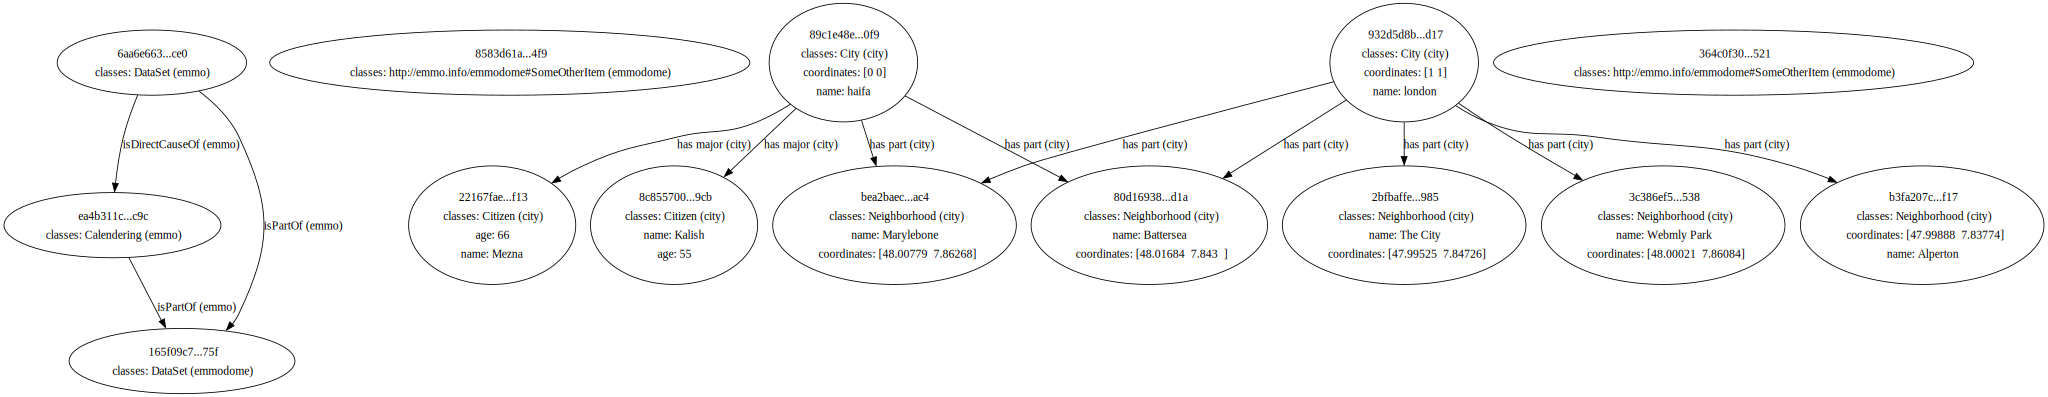

In [44]:
semantic2dot(core_session)